# House Price - Regression

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#open data in pandas dataframe
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [4]:
print(df.columns.values)

['Avg. Area Income' 'Avg. Area House Age' 'Avg. Area Number of Rooms'
 'Avg. Area Number of Bedrooms' 'Area Population' 'Price' 'Address']


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
# we can see there is no missing data

,Total,Percent
Avg. Area Income,0,0.0
Avg. Area House Age,0,0.0
Avg. Area Number of Rooms,0,0.0
Avg. Area Number of Bedrooms,0,0.0
Area Population,0,0.0


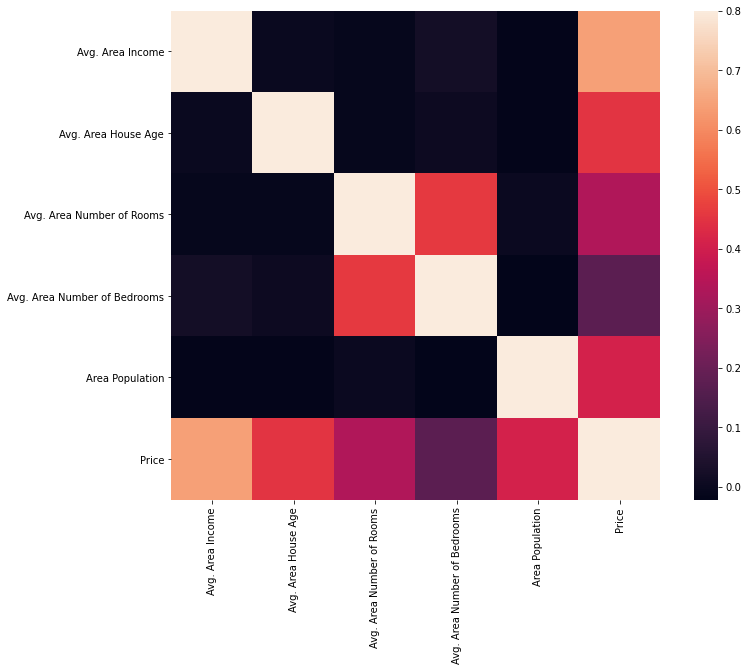

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
# from adress column grab the state names
df['State']=df['Address'].apply(lambda x: x.split(' ')[-2])
df = df.drop(['Address'], axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


In [9]:
df['State'].value_counts()

AA    177
AP    170
AE    167
OR     91
GU     91
     ... 
KS     67
WI     67
IL     64
MD     62
VI     55
Name: State, Length: 62, dtype: int64

In [10]:
y = df['Price']
df = df.drop("Price", axis=1)
X = df.iloc[:, :]

In [11]:
#convert categorical variable into dummy
X = pd.get_dummies(X)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State_AA,State_AE,State_AK,State_AL,State_AP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Machine Learning Techniques

In [14]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_linear = metrics.r2_score(y_test, y_pred)
r2_linear

0.9133499880286936

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_svr = metrics.r2_score(y_test, y_pred)
r2_svr

-0.0015474149650762659

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_tree = metrics.r2_score(y_test, y_pred)
r2_tree

0.7316668773543737

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_forest = metrics.r2_score(y_test, y_pred)
r2_forest

0.8613944259320081

In [24]:
models = pd.DataFrame({
    'Model': ['DecisionTreeRegressor', 'RandomForestRegressor', 'SVR', 
              'LinearRegression'],
    'Score': [r2_tree, r2_forest, r2_svr, 
              r2_linear]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,LinearRegression,0.913350
1,RandomForestRegressor,0.861394
0,DecisionTreeRegressor,0.731667
2,SVR,-0.001547
